#### import tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

2021-11-12 19:29:43.461642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-12 19:29:43.461674: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__

'2.7.0'

#### plot-packages: matplotlib

In [3]:
import matplotlib.pyplot as plt

#### Load CIFAR train and test images

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#### Normalize pixel values to be between 0 and 1

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#### define class label

In [6]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck',
]

#### View data

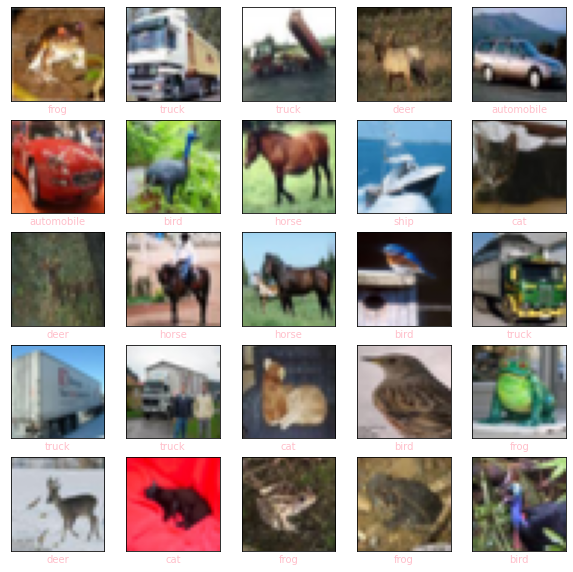

In [7]:
plt.figure(figsize=(10,10)) # 10 mean 10 (inch)
for i in range(25):
    ax = plt.subplot(5,5,i+1) # subplot(nrows, ncols, plot_index) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    
    ax.xaxis.label.set_color('pink')
    
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    
plt.show()

In [8]:
train_images[0].shape

(32, 32, 3)

## Create Model

#### about tf.keras.layers.Conv2D

```python
tf.keras.layers.Conv2D(
    filters, # the number of output filters
    kernel_size, # specifying the height and width
    strides=(1, 1), # pecifying the strides along the height and width.
    padding='valid',
    data_format=None, 
    dilation_rate=(1, 1), 
    groups=1, 
    activation=None,
    use_bias=True, 
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', 
    kernel_regularizer=None,
    bias_regularizer=None, 
    activity_regularizer=None, 
    kernel_constraint=None,
    bias_constraint=None, 
    **kwargs
)
```

In [9]:
model = models.Sequential()

model.add(
    layers.Conv2D(
        32, 
        (3, 3), 
        activation='relu', 
        # padding='same',
        input_shape=(32, 32, 3)
    )
)

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2021-11-12 19:30:02.371364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-12 19:30:02.371405: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-12 19:30:02.371434: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PUFF-DESKTOP-X): /proc/driver/nvidia/version does not exist
2021-11-12 19:30:02.371727: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


- each filter will have 1 bias because the default of use_bias=True
- So, the parameters in first conv2d is:
    we have 32 filters, each filter is (3, 3) <br>
    The param of each filter is: <br>
    [ input_channel * (filter_h * filter_w) ] + 1 (bias) = 3 * (3 * 3) + 1 = 27 + 1 = 28
- 28 * total_filter_count = 28 * 32 = 896

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

#### Add fully connected layer

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',))
model.add(layers.Dense(10))

### Final Summary of our model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Compile and train the model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

2021-11-12 19:32:06.933556: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.5014 - accuracy: 0.4538 - val_loss: 1.2326 - val_accuracy: 0.5598
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1244 - accuracy: 0.6023 - val_loss: 1.1559 - val_accuracy: 0.5920
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9720 - accuracy: 0.6602 - val_loss: 0.9398 - val_accuracy: 0.6738
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8718 - accuracy: 0.6934 - val_loss: 0.9592 - val_accuracy: 0.6710
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8001 - accuracy: 0.7185 - val_loss: 0.8990 - val_accuracy: 0.6944
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7444 - accuracy: 0.7393 - val_loss: 0.8830 - val_accuracy: 0.6968
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6904 - accuracy: 0.7571 - val_loss: 0.8802 -

## Evaluate the model

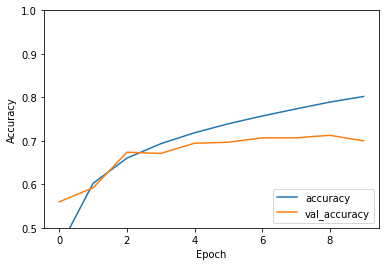

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.9312 - accuracy: 0.6999 - 1s/epoch - 4ms/step


In [22]:
print(test_acc)

0.6998999714851379
